# Insurance Charges Prediction with Linear Regression

## 1. Initial Dataset Evaluation 

The dataset is well-suited for linear regression:

**Data types**
- Linear regression is used to predict continuous values, in this case the target variable (charges) is a continuous value, suitable for linear regression.  

- The independent variables include numerical features such as `age`, `bmi` and `children`, which we can assume have a linear relationship with the target variable based on domain knowlege. Categorical features such as `sex`, `smoker` and `region` can also be used in linear regression, so long as they are encoded.  

- The features are included in the dataset are logically related to medical costs, making them potentially strong predictors for insurance charges.

**Data Quality and Common Pitfalls**
- The data was found to be generally clean and structured with no missing or inconsistently formatted values.

- Categorical variables must be converted into numerical values, improper encoding could potentially introduce bias or multicollinearity.

- Some variables could lead to multicollinearity, for example, `age` and number of `children` may be correlated, which can reduce the reliability of the estimated coefficients.

- The dataset is prone to outliers and skewness, an example of this can be observed in the charges column, where fewer individuals have significantly higher charges, skewing the data towards he right

- The dataset is US-based and is subject to demographic bias when considering the South African population, however this limitation is acceptable given that this model is just being used as a proof of concept.

- The dataset could be argued to not contain enough relevant information about the individuals, such as pre-existing medical conditions which could be responsible for outliers in the data, such as those with highly elevated charges, thus impacting prediction quality.

---


## 2. Analysis Plan

#### a. Exploratory Data Analysis (EDA) Plan

| Steps | Purpose |
|-------|---------|
| **Load and Inspect Data** (`insurance.csv`) | Check for missing values, data types, and overall shape. |
| **Summary Statistics** (`describe()`) | Understand central tendency and spread of numerical variables. |
| **Data Types Check** | Identify which features are categorical vs numerical. |
| **Check for Duplicates and Missing Values** | Clean data to avoid redundancy or incomplete samples. |
| **Visual Inspection** (histograms, boxplots) | Spot outliers, skewed distributions, or unusual patterns. |
| **Correlation Heatmap** | Assess linear correlation between numeric features and the target (`charges`). |
| **Pairplots/Scatterplots** | Visually explore potential linear relationships. |
| **Encode Categorical Variables** | Use one-hot encoding carefully to avoid dummy variable trap. |


#### b. Feature Selection Plan

| Steps | Reason |
|-------|--------|
| **Include all available features initially** | All features are relevant based on domain knowledge. |
| **One-Hot Encode Categorical Features** (`sex`, `smoker`, `region`) | Ensure the model can process these variables numerically. |
| **Backward Elimination (based on p-values)** | Remove statistically insignificant variables to improve model performance. |

#### c. Model Training Plan

| Steps | Reason |
|-------|--------|
| **Use Scikit-learn and Statsmodels** | Libraries to train and assess the performance of the model. |
| **Train-Test Split (80/20)** | Validate generalisation performance of the model. |


#### d. Model Evaluation Plan

| Metrics | Purpose |
|---------|---------------|
| **R² Score (Coefficient of Determination)** | Measures how well the model explains variance in `charges`. |
| **Mean Absolute Error (MAE)** | Interpretable average prediction error. |
| **Root Mean Squared Error (RMSE)** | Penalises larger errors more. Good for comparison. |
| **Visual: Actual vs Predicted Plot** | Spot patterns of under/overestimation. |
| **Residual Plot** | Check for non-randomness, which violates linear assumptions. |


#### e. Report Writing Plan

| Section | Content |
|---------|---------|
| **1. Introduction** | Purpose of the analysis and business context (South African medical aid scenario). |
| **2. Dataset Overview** | Description of features, target variable, and dataset source. |
| **3. EDA Summary** | Key insights, visualisations, and cleaning steps. |
| **4. Model Training Process** | Feature selection, encoding, model training steps. |
| **5. Model Evaluation** | Metrics, graphs, and interpretation. |
| **6. Recommendations** | How results could be used to inform pricing or business decisions. |
| **7. Limitations & Future Work** | Brief note on generalisability and further improvements. |




---
## 3. Conducting the Analysis
### **a. Exploratory Data Analysis**

In [456]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("insurance.csv")

# Inspect the first few rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [457]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Numerical Features
`age`, `bmi`, `children`, `charges` (target feature)

### Categorical Features
`sex`, `smoker`, `region`

---

In [458]:
# Statistical summary of numeric variables
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Descriptive Statistics Summary

This summary shows us that the dataset looks clean and complete — every column has the **same number of entries**, and there are **no missing values**.

- **Age** ranges from 18 to 64, with the average person being around 39 years old. This gives us a good spread of adult ages.

- **BMI** (which tells us about body weight relative to height) averages around 30, which is slightly above the healthy range. Some people in the dataset have very high BMI values, suggesting we have a mix of body types.

- **Children** shows how many kids a person has, ranging from 0 to 5. Most people have 1 or 2 children.

- **Charges** is the cost of medical insurance. It varies a lot — from just over $1,000 to more than $63,000. This big difference means some people are likely much more expensive to insure than others.

Overall, the data looks useful and reliable for building a model. There is a good variety in each column, and no obvious problems like strange or missing values.

#### Cleaning the Data

In [459]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

>There are no missing values present in the dataset.

In [460]:
# Check for duplicates
df.duplicated().sum()

np.int64(1)

>One duplicated row is present in the dataset. In this case, the best course of action is to remove it to ensure that no individual record is overrepresented in the model.

In [461]:
# Remove duplicate
df = df.drop_duplicates()

# Veruify if duplicate is removed
df.duplicated().sum()

np.int64(0)

>No more duplicates are present in the dataset.

---

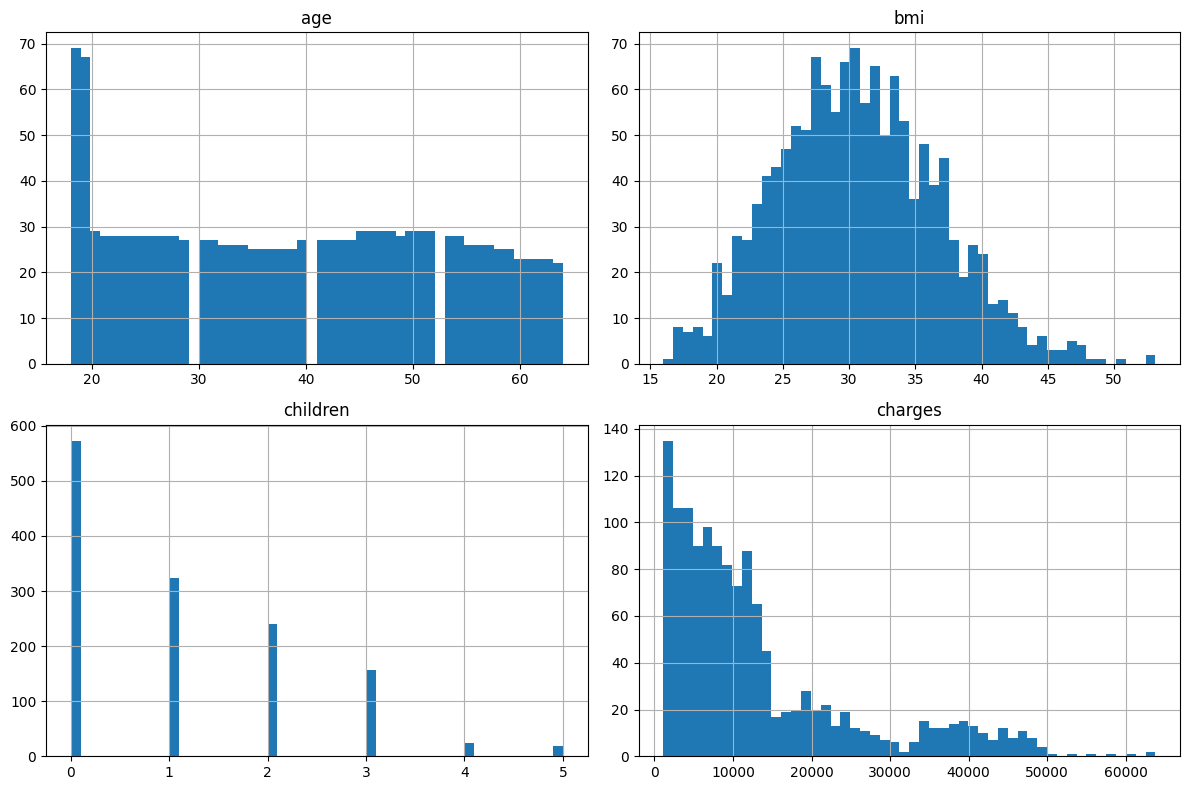

In [462]:
# Visualise distribution of numerical features
df.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

#### Distribution Analysis:

Here we gain some insight into the distribution of some of the features present in the dataset. Some key factors worth mentioning are:

- Individuals between the ages 18 and 20 seem to be represented over twice as much as any other age group.

- `bmi` seems to be quite fairly distributed.

- We see a fairly expected linear distribution in then number of children per individual, however the dataset may be biased in its representation of individuals with no children given that the number of young adults between 18 and 20 are being overrepresented - an age group that is likely to have very few to no children.

- There is a large variation in `charges`, but seemingly due to few outliers with much higher charges than the majority of the sample skewing the data to the right, the model may struggle with predicting individuals with such high charges.

---

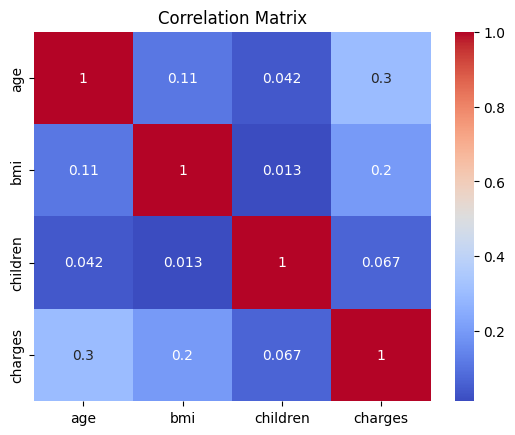

In [463]:
# Check correlations between numerical features and target
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Correlation Analysis for Numerical Features:

1. **Age and Charges** - **0.30**  
- This is a **moderate positive correlation**.
- It suggests that as people get older, their charges tend to increase.
- It makes sense — older individuals might need more or costlier healthcare services.

2. **BMI and Charges** - **0.20**  
- A **weak to moderate positive correlation**.
- Indicates that a higher BMI might be associated with higher charges, likely due to health conditions related to obesity.

3. **Children and Charges** - **0.067**  
- This is a **very weak correlation**.
- Having more children doesn’t seem to significantly affect charges in this dataset.

4. **Age and BMI / Children and others**  
- All other correlations (like `age` with `bmi`, or `children` with anything) are quite low, mostly under 0.1, indicating little to no linear relationship.

#### Insights gained:

- **Age and BMI** appear to be the most meaningful features in relation to `charges`.

- **Children** might not contribute much to predicting charges in a linear model.

- None of the features seems to be strongly correlated with each other which is good, and allows us to rule out multicollinearity being present in the dataset.

---

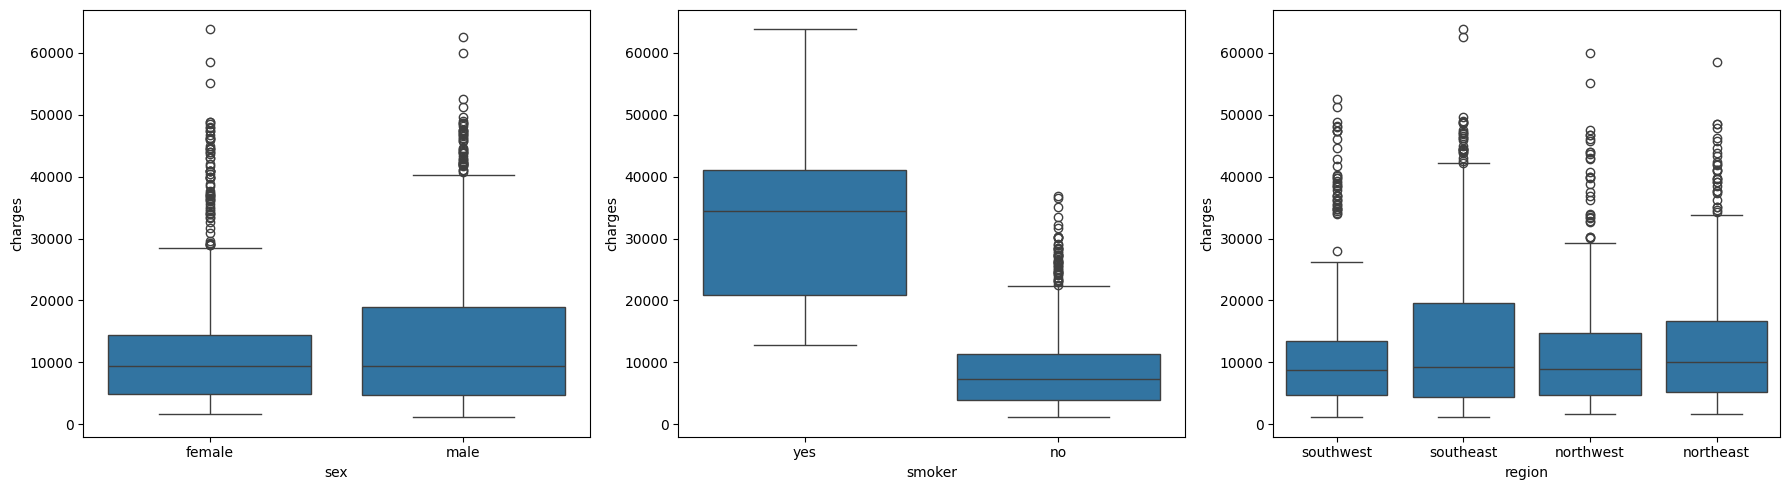

In [514]:
# Boxplots to check outliers and group effects
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x="sex", y="charges", data=df, ax=axs[0])
sns.boxplot(x="smoker", y="charges", data=df, ax=axs[1])
sns.boxplot(x="region", y="charges", data=df, ax=axs[2])
plt.tight_layout()
plt.show()

#### Boxplot Analysis for Categorical Features

Here I use a series of boxplots to visualise and interpret the effects of the categorical features present in the dataset (`sex`, `smoker` and `region`).

1. **Sex vs Charges**, shows that males and females show a similar distribution of charges, the median charges being so close suggests that gender does not significantly impact charges. Both groups show outliers for costs, indicating that gender is not directly responsible for significantly higher charges.

2. **Smoker vs Charges**, indicates that smokers have significantly higher charges compared to non-smokers. This is evident by the median for smokers being substantially higher, to where the range extends to the top of the chart. This implies that smoking status has a strong positive correlation with higher charges, and with such a significant difference, `smoker` is most likely a **key factor in predicting** `charges`.

3. **Region vs Charges**, shows that region has a relatively minor effect on charges, since all regions have similar medians and ranges, the only thing worth noting is that the `southeast` region has slightly more spread than other regions, and `southwest` has slightly less spread. `Region` seems to be a **weak predictor** for `charges`.

---

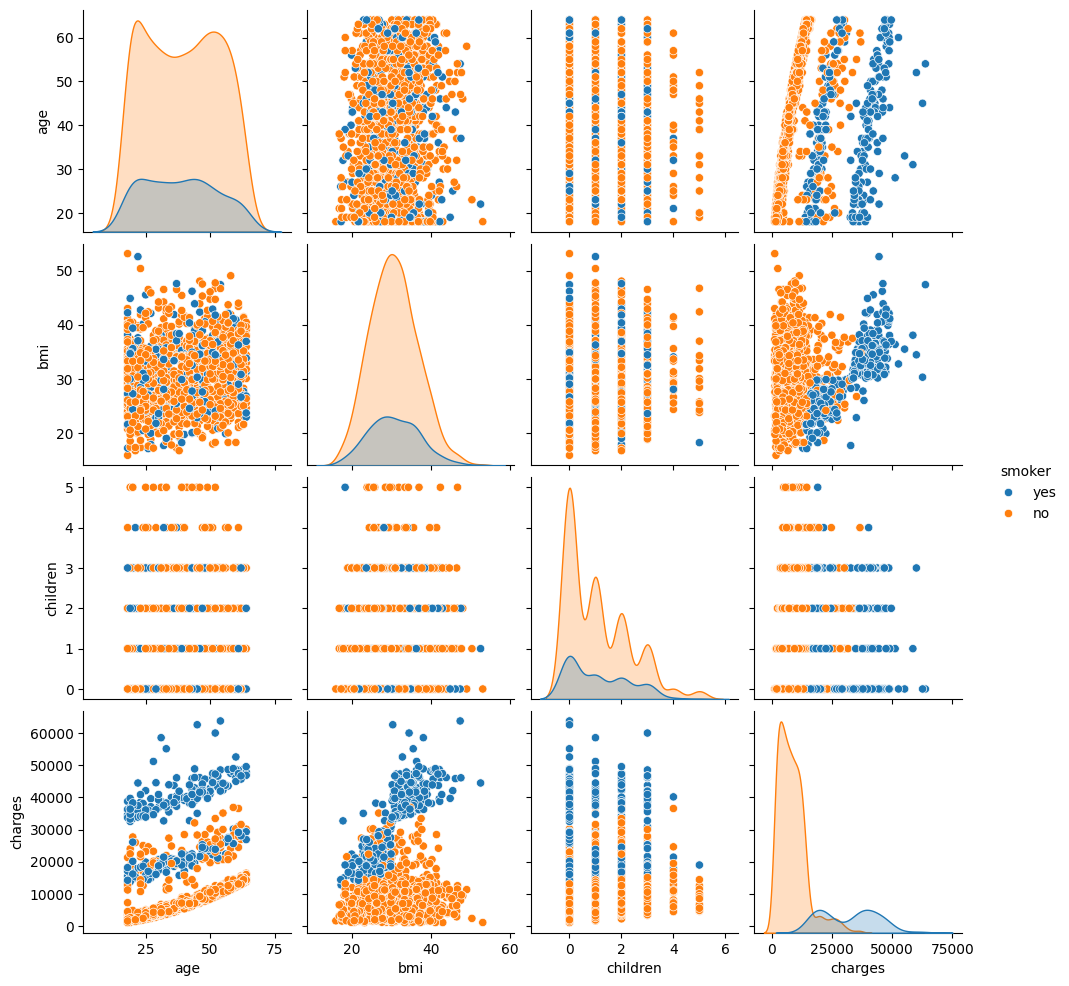

In [515]:
# Pairplot to inspect potential linear relationships
sns.pairplot(df, hue="smoker")
plt.show()

#### Further Analysis of Smoker vs Non-Smoker with Pairplot

After discovering the importance of `smoker` as a potential key factor in predicting `charges`, using a pairplot to view relationships between the numerical features whilst highlighting smokers vs non-smokers allows for the observation of potential relationships between variables.

| Variable Pair         | Relationship Type                |
|-----------------------|----------------------------------|
| Smoker vs Charges     | Strong positive (especially smokers)   |
| Age vs Charges        | Moderate positive                |
| BMI vs Charges        | Mild to moderate (stronger if smoker) |
| Children vs Charges   | Very weak or none                |

It is worth noting that from observing the pairplot, we can see that the data contains a good spread of smokers across all ages and bmi's, so as to not introduce bias to individuals within a certain age group or with a certain bmi.

We also see that there are individuals with varying numbers of children across all ages, which means that `children` is not influenced by age in this dataset. One of my original concerns was that age would influence the number of children, thus introducing multicollinearity, but that seems not to be the case, since there seems to be no major influence. This was evident in the correlation matrix, but is more visible here.

---

### **b. Feature Selection**

In [516]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

In [517]:
# Check feature correlations with target
correlations = df_encoded.corr()["charges"].sort_values(ascending=False)
print("Feature correlations with charges:\n", correlations)

Feature correlations with charges:
 charges             1.000000
smoker_yes          0.787234
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children            0.067389
sex_male            0.058044
region_northwest   -0.038695
region_southwest   -0.043637
Name: charges, dtype: float64


In [518]:
import statsmodels.api as sm

# Convert boolean columns to integers
X = X.astype({col: int for col in X.select_dtypes(include=['bool']).columns})

# Drop features with high p-values
# OLS regression was used to check p-values, and the following features were found to have high p-values
# (greater than 0.05) and were dropped from the model
X = X.drop(columns=['sex_male', 'region_northwest', 'region_southwest', 'region_southeast'])

# Add an intercept (beta0) to the model to avoid forcing the line through the origin
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     996.5
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:56:07   Log-Likelihood:                -13541.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1332   BIC:                         2.712e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    942.630    -12.835      0.0

#### Feature Selection Summary

- Categorical features (`sex`, `smoker`, `region`)were encoded using one-hot encoding.

- `charges` selected as target feature.

- Feature correlations with the target show that some weak correlations were found.

- OLS regression was used to iteratively identify features with p-values > 0.05 and remove them, resulting in the removal of features: `sex_male`, `region_northwest`, `region_southwest` and `region_southeast`

- Final OLS regression results show no features with p-values > 0.05



---

### **c. Model Training**

In [519]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant to both train and test
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit model
model = sm.OLS(y_train, X_train_sm).fit()

#### Training Summary

- Data split into training and test sets with an 80:20 split, random_state=42 used as default.

- Constant added to both sets.

- Model fitted using statsmodels.api OLS.

---

## 4. Model Evaluation

### a. Interpretation and Evaulation of Trained Model

In [520]:

# Predict and evaluate
y_pred = model.predict(X_test_sm)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.8045531086669285
RMSE: 5992.87505963821
MAE: 4198.5926123563695


#### Interpretation of Evaulation Metrics

The R² Score of 0.805 means about 80.5% of the variation in insurance charges is explained by this model. It suggests that this model has good explanatory power.

The Root Mean Squared Error (RMSE) of 5992.88, means that on average, the predictions are off by about $5993. Bigger mistakes carry more weight with this metric, which means that the errors with outliers in the data get magnified.

Mean Absolute Error (MAE) of 4198.59 suggests that on average the predictions are off by $4199, this metric is calculated by treating all errors equally regardless of the size of the error unlike RMSE. This is a more realistic metric since we know our dataset contains some large outliers.

The gap between the MAE and RMSE indicates that some larger errors exist in our predictions, but not to an extreme degree.

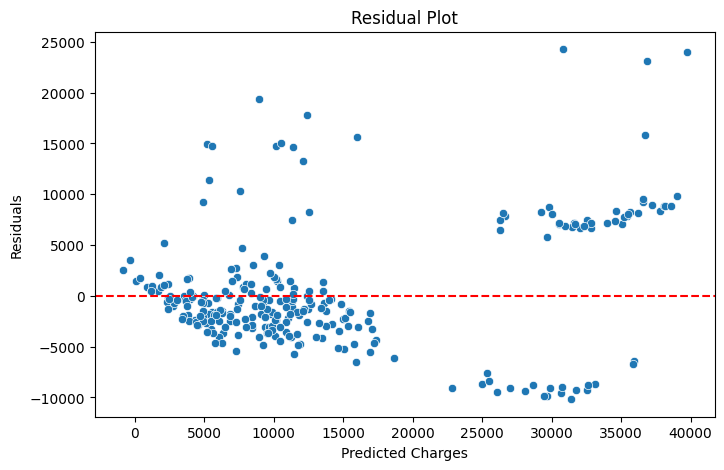

In [521]:
# Calculate residuals
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

#### Residual Analysis

Ideally, the residuals should be randomly scattered around the red line at 0. Here however we see that the residuals are tightly clustered in bands at different ranges. These quite distict horizontal bands are a huge hint that there different groups present in the data, I assume that smoker vs non-smoker might need to be modelled separately. I assume this based on earlier exploratory analysis, where visible banding between smoker and non-smoker were visible in the pair plot.


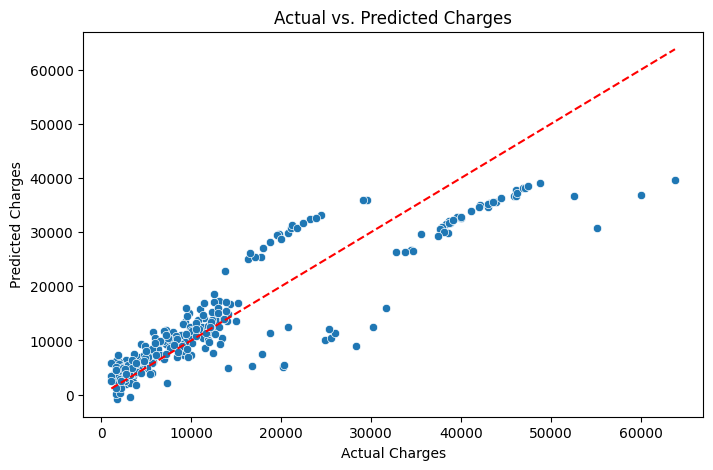

In [522]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()

#### Actual vs. Predicted Charges Analysis

In the plot we can see that the values start out clustered relatively close to the regression line, but again, distinct bands are visible just above and below out prediction, these bands seem to follow the same gradient. I believe that is a strong sign that the model is averaging between two distinct groups in the dataset, which I heavily assume are smoker vs non-smoker groups.

### **b. Retraining the Model**

In the previous model, which used just used backward elimination, I assessed that the model is potentially struggling to accurately predict smoker and non-smoker charges and is fitting between them instead. I plan on retraining the model using a different feature selection procedure, first the data will be standardised, which is an important requirement for the next step, where I will be using lasso regularisation. I won't be using backward elimination this time around, since I will let lasso perform feature selection.

Best alpha: 42.04422386297799
R² Score: 0.8050892536723557
RMSE: 5984.649662635322
MAE: 4184.559567869828


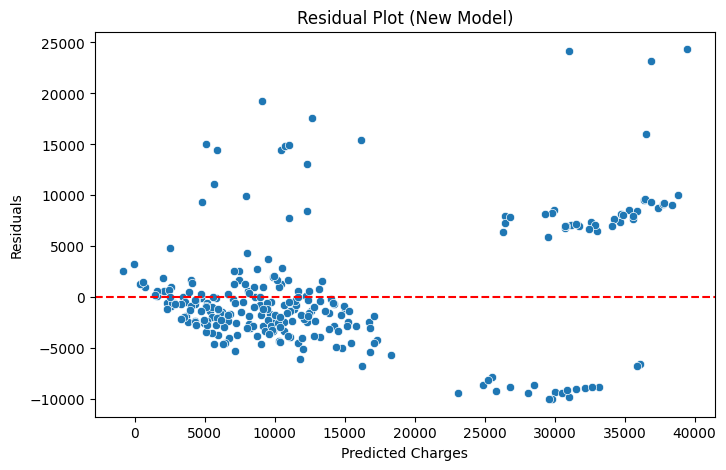

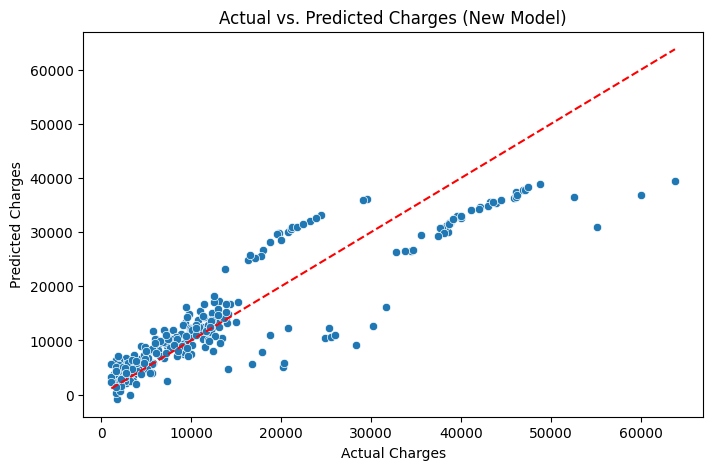

In [523]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Convert boolean columns to integers
X = X.astype({col: int for col in X.select_dtypes(include=['bool']).columns})

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardise the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Lasso model with LassoCV (automatically chooses the best alpha)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Print the best alpha
print(f"Best alpha: {lasso.alpha_}")

# Make predictions
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

# Calculate residuals
residuals = y_test - y_pred

# Plotting the residuals and actual vs predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot (New Model)")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (New Model)")
plt.show()


#### Analysis of the New Model

The newly trained model, using standardised data and lasso for regularisation proved ineffective in dealing with the banding issues. We can see that our evaluation metrics only differ very slightly and our plots reveal the same trends and issues as the ones analysed for the prior model.

#### Future Recommendations

- **Handling Outliers**: One of the potential issues in the current model could be the presence of the large unexplained outliers in the dataset, that might distort predictions.

- **Training Separate Models for Smokers and Non-Smokers**: While the current models combine both groups into a single model, separating the models might better address the banding issues where the model is predicting an average between the two groups. By using separate models, we could probably achieve better prediction results for each of the groups.